# Übung 8

**Gruppenname:**

*TLJ*

Christian Rene Thelen, Artur Less, Karl Johannes

### 8.1 Entscheidungsbaum - Information Gain

Ein Freundeskreis von Studierenden wandert gerne. Sie haben sich in der Vergangenheit notiert, welche Wetterbedingungen bei ihren Wanderungen herrschten:

![Decision Tree Table](https://data.bialonski.de/ml/table-decision-tree-exercise.png)

Eine Studentin möchte einen Entscheidungsbaum aufbauen, um besser zu verstehen, unter welchen Bedingungen die Gruppe wandert. Wir werden uns hier auf den ersten Schnitt im entstehenden Entscheidungsbaum beschränken.

**Ihre Aufgaben:**

(1) Schlagen Sie in den Folien der Vorlesung nach, wie der Information Gain definiert ist, und geben Sie ihn hier **in eigenen Worten** wieder.

Als **Information Gain** (oder auch Mutual Information) wird die Abnahme des mittleren Informationsgehalts eines Ergebnisses der Zufallsvariablen $X$ durch Kenntnis des Ergebnisses einer Zufallsvariablen $Y$ genannt. 
$$
	\text{IG}(X, Y) = H(X) - H(X|Y)
$$

(2) Bestimmen Sie die Entropie für "Wandern gehen" (und geben Sie ihren Wert hier an).

Die **Entropie** $H(X)$ ist der mittlere Informationsgehalt eines Ereignisses (Ausgangs) eines Zufallsexperiments mit Zufallsvariable $X$. 
$$
	H(X) = E(I) = -\sum_{k=1}^C p_k \log_2 (p_k)
$$

Hier bedeutet das, für $X=\{\text{Wandern gehen}\}$ ist die Entropie
$$
H(X) = -\left(\frac{3}{5}\log_2 \left(\frac{3}{5}\right) + \frac{2}{5}\log_2 \left(\frac{2}{5}\right)\right) \approx 0.97095
$$

(3) Bestimmen Sie die bedingten Entropien für "Wandern gehen" bezüglich der Features und geben Sie die Werte, die Sie erhalten haben, an.

Die **bedingte Entropie** $H(X|Y)$ ist der mittlere Informationsgehalt eines Ergebnisses einer Zufallsvariablen $X$ unter der Bedingung, dass der Wert einer Zufallsvariablen $Y$ bekannt ist. 
$$\begin{aligned}
	H(X|Y) &= \sum_j p(y_j) \cdot H(X|Y=y_j) \\
	&= - \sum_i \sum_j p(y_j)\cdot p(x_i|y_i)\cdot\log_2 \left( p(x_i|y_j) \right) \\
	&= - \sum_{i, j} p(x_i, y_j) \log_2 \frac{p(x_i, y_j)}{p(y_j)}
\end{aligned}$$

Das bedeutet, dass die folgenden Fälle zu unterscheiden sind:
$$\begin{aligned}
  H(\text{Wandern gehen} | \text{Wetter}) 
  &= -\frac{2}{5} \left( 1 \cdot \log_2 1 + 0\right) - \frac{3}{5} \left( \frac{1}{3} \cdot \log_2 \frac{1}{3} + \frac{2}{3} \cdot \log_2 \frac{2}{3} \right) \\
  &= 0.551\\
  H(\text{Wandern gehen} | \text{Temperatur}) 
  &= -\frac{2}{5} \left( \frac{1}{2} \cdot \log_2 \frac{1}{2} + \frac{1}{2} \cdot \log_2 \frac{1}{2} \right) - \frac{3}{5} \left( \frac{1}{3} \cdot \log_2 \frac{1}{3} + \frac{2}{3} \cdot \log_2 \frac{2}{3} \right) \\
  &= 0.951\\
  H(\text{Wandern gehen} | \text{Wind}) 
  &= -\frac{2}{5} \left( \frac{1}{2} \cdot \log_2 \frac{1}{2} + \frac{1}{2} \cdot \log_2 \frac{1}{2} \right) - \frac{3}{5} \left( \frac{1}{3} \cdot \log_2 \frac{1}{3} + \frac{2}{3} \cdot \log_2 \frac{2}{3} \right) \\
  &= 0.951
\end{aligned}$$

(4) Bestimmen Sie den Information Gain für jedes Feature und geben sie die Werte hier an.

Der Information Gain $\text{IG}(X, Y) = H(X) - H(X|Y)$, also hier:

$$\begin{aligned}
  \text{IG}(\text{Wandern gehen}, \text{Wetter}) &= 
  H(\text{Wandern gehen}) - H(\text{Wandern gehen} | \text{Wetter}) \\
  &= 0.971 - 0.551\\
  &= 0.42\\
  \text{IG}(\text{Wandern gehen}, \text{Temperatur}) &= 
  H(\text{Wandern gehen}) - H(\text{Wandern gehen} | \text{Temperatur})  \\
  &= 0.971 - 0.951\\
  &= 0.02 \\
  \text{IG}(\text{Wandern gehen}, \text{Wind}) &= 
  H(\text{Wandern gehen}) - H(\text{Wandern gehen} | \text{Wind}) \\
  &= 0.971 - 0.951 \\
  &= 0.02
\end{aligned}$$

(5) Basierend auf Ihrer Beobachtung in Schritt (4): Welches Feature wird für eine Teilung in zwei Äste benutzt?

Wir verwenden das Feature, mit dem höchsten Information Gain, also _Wetter_.

### 8.2 Entscheidungsbäume (CART-Algorithmus)

In dieser Aufgabe werden Sie einen binären Entscheidungsbaum, wie Sie ihn in der Vorlesung kennengelernt haben, selbst implementieren.
Sie werden den Algorithmus CART implementieren und die Shannon-Entropie, bzw. den **Information Gain (IG)** als Metrik zum Aufbau des Baumes verwenden.<br>
Der CART Algorithmus ist nicht auf die Verwendung des IG als Metrik angewiesen und kann zum Beispiel auch mit dem **Gini Unreinheit** umgesetzt werden.

**Ihre Daten**<br>
Sie werden erneut den Schwertlilien Datensatz untersuchen, den Sie bereits in einer der ersten Übungen kennengelernt haben.
Zur Erinnerung: Der Datensatz enthält $N=150$ Datenpunkte mit jeweils drei Features. Jede Schwertlilie kann genau einer der drei Schwertlilienarten angehören ($C=3$ Klassen).
Ihre Aufgabe wird es sein, einen **Klassifikationsbaum** zu trainieren, der die drei Klassen basierend auf zwei ausgewählten Features ('Petal width' und 'Sepal width') klassifiziert.

**Hinweise zur Nomenklatur**<br>
Alle Begriffe und Definitionen, die in dieser Übung benötigt werden, haben Sie in der Vorlesung kennengelernt.
Schauen Sie daher bei Unklarheiten noch einmal in die Folien.
Die wichtigsten Formeln sind in den Teilaufgaben noch einmal aufgeschrieben.<br>
Der Datensatz mit $N=150$ Datenpunkten setzt sich zusammen aus den Labels $y\in\{0,1,2\}^N$ und einer Feature-Matrix mit 2 Features.
Die Matrix hat damit eine Größe von $N\times 2=150 \times 2$.
Wir bezeichnen mit $x_{i,j}$ den Wert des $j$-ten Features des $i$-ten Datenpunkts und mit $x_{:,j}$ den Feature-Vektor des $j$-ten Features für alle Datenpunkte.

Es werden in den Aufgaben folgende Kurzschreibweisen verwendet:<br>
$p(y=0)=\frac{\big|\{y_i|y_i=0\}\big|}{\big|y\big|}$<br>
$p(x_{:,j} \lt z)=\frac{\big|\{x_{i,j}|x_{i,j} \lt z\}\big|}{\big|x_{:,j}\big|}$<br>
$p(y=0|x_{:,j} \lt z)=\frac{\big|\{y_i|y_i=0,\: x_{i,j} \lt z\}\big|}{\big|\{y_i|x_{i,j} \lt z\}\big|}$

**CART-Algorithmus (Überblick)**<br>
CART erstellt Klassifikationsbäume rekursiv nach folgendem Schema (Details finden Sie in den Teilaufgaben):
1. Falls eines der Abbruchkriterien erfüllt ist, breche den aktuellen Rekursionsschritt ab.
2. Berechne für jeden möglichen binären Split der Daten im aktuellen Knoten den Information Gain (IG) als Differenz zwischen der Entropie des aktuellen Datensatzes und den Entropien der beiden Teil-Datensätze, die aus einem Split des Datensatzes hervorgehen.<br>
   IG bei Split des Datensatzes am Grenzwert $z$ des Features $x_{:,j}$: $$H(Y)-p(x_{:,j} \lt z)H(Y|x_{:,j} \lt z)- p(x_{:,j} \ge z)H(Y|x_{:,j} \ge z)$$
3. Splitte den aktuellen Knoten an dem Grenzwert $z^*$ des Features $x_{:,j}$, mit dem der größte Information Gain erzielt wird. Daraus resultieren zwei neue, kleinere Knoten mit Teil-Datensätzen: $\{y_i,(x_{i,1},x_{i,2})|x_{i,j} \lt z\}$ und $\{y_i,(x_{i,1},x_{i,2})|x_{i,j} \ge z\}$
4. Wiederhole die Rekursion mit den beiden neuen Knoten und Teil-Datensätzen


**Ihre Aufgaben**

(1) Zur Beurteilung eines Splits benötigen wir zunächst Funktionen, die die Entropie und den Information Gain berechnen.

Schreiben Sie eine Funktion `entropy`, welche das Ergebnis eines Zufallsexperiments mit Zufallsvariable `Y` als Parameter übergeben bekommt und die Entropie `H(Y)` berechnet.
Hier noch einmal die Formel zur Berechnung der Entropie eines Ereignisses `Y`, das die Werte zwischen `1` und `C` annehmen kann:

$$
H(Y) = - \sum_{k=1}^C {p(y=k)~\log_2{p(y=k)}}
$$

**Hinweis:**<br>
Bedenken Sie den Sonderfall, wenn alle Datenpunkte das gleiche Label haben.

**Anschaulich:**<br>
Sie haben die Entropie in der Vorlesung als *mittleren Informationsgehalt* des Ereignisses einer Zufallsvariable kennengelernt.
Eine weitere Interpretation der Entropie stellt diese als *mittlere Unsicherheit* über das Ereignis dar und beantwortet die Frage: Wie unsicher ist das Ergebnis der zugrundeliegenden Zufallsvariable?
Falls das Ergebnis unsicher ist (wie das Ergebnis eines einfachen Münzwurfs, bei dem wir nicht wissen ob Zahl oder Kopf oben liegen wird), ist die Entropie groß.
Ist das Ergebnis einer Zufallsvariable nahezu sicher (Ziehen einer Kugel aus einer Urne mit 9 schwarzen und einer roten Kugel), wird die Entropie klein.<br>
Wir wollen die Unsicherheit unseres Klassifikationsbaums über die Labels in den Blättern bestimmen und minimieren.
Die Entropie gibt uns eine einfache Möglichkeit dazu, da sie angewendet auf die Labels gerade diese Unsicherheit misst.
Sind alle Labels unserer Trainingsdaten in einem Blatt gleich, können wir sehr sicher sagen, dass neue Daten in diesem Blatt das gleiche Label annehmen werden, und die Unsicherheit des Blatts ist sehr gering (Entropie gleich 0).
Enthält ein Blatt einen Mix aus verschiedenen Labels, können wir nur eine sehr unsichere Aussage darüber treffen, welches Label neue Daten in diesem Blatt annehmen sollen und die Unsicherheit ist sehr groß (Entropie größer 0).

In [1]:
### Alle wichtigen imports; kann ergänzt werden
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
### Aufgabe 1
def entropy(Y: np.ndarray) -> float:
    """Berechne die Entropie von H(Y), wobei Y eine Liste von Ereignissen ist z.B.: [1,2,1,1,2,3,1,2,3]"""
    entropy: float = 0.0
    entries: int = Y.size
    for k in np.unique(Y):
        p_k = np.sum(Y == k) / entries
        entropy -= p_k * np.log2(p_k)
    return entropy

entropy(np.array([0, 0, 1, 1, 2]))

1.5219280948873621

(2) Als nächstes benötigen wir die Funktion zur Berechnung des IG bei einem Split.
Schreiben Sie also eine Funktion `info_gain`, die als Parameter einen Vektor mit Labels `y`, einen Vektor `x_j` mit dem Feature, das zum Split betrachtet werden soll, und den Wert `z` des Features, an dem der Split gesetzt werden soll, übergeben bekommt.

Die Funktion soll die Formel für den IG aus dem oben angegeben Überblick des CART Algorithmus berechnen und zurückgeben. Zur Erinnerung, die Formel für den Split am Grenzwert $z$ des Features $x_{:,j}$ lautet: <br>

$$H(Y)-p(x_{:,j} \lt z)H(Y|x_{:,j} \lt z)- p(x_{:,j} \ge z)H(Y|x_{:,j} \ge z)$$

Die bedingte Entropie war definiert als: <br>
$$H(Y|x_{:,j} \lt z)=- \sum_{k=1}^C{p(y=k|x_{:,j}<z)\log_2{p(y=k|x_{:,j}<z)}}$$

**Anschaulich:**<br>
Der Information Gain beschreibt die Differenz der Unsicherheit, die wir vor und nach einem Split über die Labels haben.
Da die Unsicherheit in den Labels durch den Split nicht schlechter, sondern (hoffentlich) besser wird, bezeichnet der IG die Menge an Informationen, die wir durch Kenntnis des Features $x_{:,j}$ (entweder kleiner oder größer $z$) über die Labels $Y$ erlangen.

**Tipp:**<br>
Sie können zur Berechnung der bedingten Entropie die Funktion `entropy` aus der letzten Aufgabe verwenden.

In [3]:
### Aufgabe 2
def info_gain(Y: np.ndarray, x_j: np.ndarray, z: float):
    n = Y.size
    H = entropy(Y)
    # H(Y|x_j < z)
    H_sz = entropy(Y[x_j < z])
    # H(Y|x_j >= z)
    H_lz = entropy(Y[x_j >= z])
    
    return H - (np.sum(x_j < z) / n) * H_sz - (np.sum(x_j >= z) / n) * H_lz

(3) Für den CART Algorithmus benötigen wir genau den Split, der für den aktuellen Knoten den maximalen IG erreicht.
Die nächste Funktion `max_info_gain`, die Sie implementieren sollen, findet genau diesen Split für einen gegebenen Vektor an Labels `y` und eine Matrix `x` mit den Features (Größe $n\times m$ mit $n$ Datenpunkten und $m$ Features).

Sie suchen in der Funktion also: $$\max_{z\in\text{unique\_values}(x_{:,j}), j=1,...,m} \left[H(Y)-p(x_{:,j} \lt z)H(Y|x_{:,j} \lt z)- p(x_{:,j} \ge z)H(Y|x_{:,j} \ge z) \right]$$

Geben Sie sowohl den Index des Features und den optimalen Wert, für den der maximale IG erreicht wird, zurück.

In [4]:
### Aufgabe 3
def max_info_gain(y, x):
    ig_feature_z: list[tuple[float, int, float]] = []
    for feature in range(x.shape[1]):
        for z in np.unique(x[:, feature]):
            ig_feature_z.append((info_gain(y, x[:, feature], z), feature, z))

    ig_feature_z = sorted(ig_feature_z, key=lambda x: x[0], reverse=True)
    return ig_feature_z[0][1], ig_feature_z[0][2]

# Sie können folgenden Code verwenden, um Ihre Implementierung
# mit den Ergebnissen aus Übung 8.1 zu vergleichen.
y_8_1 = np.array([0, 0, 1, 1, 0])
x_8_1 = np.array([[1, 0, 1, 1, 0], [1, 1, 0, 1, 0], [0, 1, 0, 1, 1]]).T
print(f'Entropie der Größe "Wandern gehen": {entropy(y_8_1)}')
i, z = max_info_gain(y_8_1, x_8_1)
print(f'Der maximale IG für die Größe "Wandern gehen" wird mit Feature {i} an Split Value {z} erreicht')

Entropie der Größe "Wandern gehen": 0.9709505944546686
Der maximale IG für die Größe "Wandern gehen" wird mit Feature 0 an Split Value 1 erreicht


(4) Nun, da wir die Metrik implementiert und damit die Logik hinter der Aufteilung der Daten zur Verfügung haben, können wir uns dem eigentlichen Entscheidungsbaum widmen. Schauen Sie sich dazu den folgenden Code an, der einen Entscheidungsbaum in einer Python-Klasse codiert. Natürlich ist diese Implementierung noch nicht vollständig. :-)

In [5]:
class DecisionTreeClassifier(object):
    def __init__(self, max_depth=5):
        self.max_depth = max_depth
        # der Entscheidungsbaum als Dictionary
        self.tree = {'depth': 0,        # Tiefe des Baumes, 0 = Wurzelknoten
                     'feature': None,   # Teile an diesem Feature
                     'split': None,     # Teile an diesem Wert
                     'value': None,     # Mehrheitslabel in diesem Knoten
                     'left': None,      # left/right = Kindknoten (neue Dictionaries)
                     'right': None}

    def fit(self, x: np.ndarray, y: np.ndarray, depth: int = 0):
        # Fall 1: dieser Knoten ist leer
        if len(y) == 0:
            return None
        # Fall 2: alle Labels im Knoten sind gleich
        elif all(label == y[0] for label in y):
            return {'depth': depth,
                    'value': y[0],
                    'left': None,
                    'right': None}
        # Fall 3: maximale Baumtiefe erreicht
        elif depth > self.max_depth:
            return None
        # Fall 4: rekursiv den Baum erstellen
        else:
            feature, split = max_info_gain(y, x)
            relevant_feature = x[:, feature]
            # np.bincount gibt ein Array zurück, bei dem der Index dem Label entspricht und der Wert die Anzahl der Vorkommen ist. Dadurch kann mittels np.argmax das Label bestimmt werden, welches am häufigsten vorkommt
            tree = {
                'depth': depth,
                'feature': feature,
                'split': split,
                'value': np.argmax(np.bincount(y)),
                'left': self.fit(x[relevant_feature < split], y[relevant_feature < split], depth + 1),
                'right': self.fit(x[relevant_feature >= split], y[relevant_feature >= split], depth + 1)
            }
            if depth == 0:
                self.tree = tree
                return self.tree
            return tree

    ### Aufgabe 4b
    def predict(self, x: np.ndarray) -> list[int]:
        prediction: list[int] = []
        for i in range(x.shape[0]):
            tree = self.tree
            while not (tree['left'] is None or tree['right'] is None):
                relevant_feature = x[i, tree['feature']]
                if relevant_feature < tree['split']:
                    tree = tree['left']
                else:
                    tree = tree['right']
            prediction.append(tree['value'])
        return prediction

Die Klasse enthält ein Attribut `tree` als Python Dictionary, mit Eigenschaften wie Baumtiefe `depth` und Kindknoten `left` bzw. `right`.
Die Methoden `fit` und `predict` sind nach den bekannten Methoden aus *sklearn* benannt. Diese Eigenschaft werden wir später ausnutzen.
Die Implementierung dieser Methoden wird Ihre Aufgabe sein!

Ihre Aufgabe besteht aus den folgenden zwei Teilen:

(4a) Vervollständigen Sie die Funktion **`fit`** in der obigen Klasse. Sie erstellt rekursiv einen Entscheidungsbaum. In jedem Rekursionsschritt wird der aktuelle "Ast" des Baumes in zwei neue Äste aufgeteilt, die jeweils mit dem rekursiven Aufruf der `fit` Methode weiter verfeinert werden.
* Die Methode bekommt einen Datensatz `X`, den zugehörigen Labelvektor `Y` und die aktuelle Baumtiefe `depth` übergeben.
* Die folgenden Sonderfälle, welche die Rekursion abbrechen, sind bereits implementiert:
 1. Leerer Knoten
 2. Maximale Baumtiefe erreicht
 3. Alle Labels in den Daten sind gleich
* Implementieren sie den "Standardfall": Nutzen Sie Ihre Methode `max_info_gain`, um herauszufinden an welchem Feature und welchem Wert Sie die Daten und Labels teilen müssen. Erstellen Sie anschließend einen neuen Knoten (ein Python-Dictionary) mit diesen Informationen.
    * `depth` - aktuelle Tiefe des Baumes
    * `feature` und `split` - die Ergebnisse der Methode `max_info_gain`
    * `value` - das Mehrheitslabel in diesem Knoten
    * Für die Attribute `left` und `right` im Dictionary wird die Methode **fit** schließlich rekursiv mit den geteilten Daten und `depth+1` aufgerufen.
* Speichern Sie den Baum in der Klassenvariable `self.tree` ab, falls `depth==0`. Falls `depth` nicht null ist, geben Sie einfach den neu erstellten Knoten zurück.

(4b) Implementieren Sie die Funktion **`predict`**.
* Die Methode bekommt einen Datensatz `X` übergeben und soll diesen mit dem Entscheidungsbaum klassifizieren.
* Durchlaufen Sie für jeden Datenpunkt von `X` den Baum bis Sie einen Blattknoten erreichen.
    * Nutzen Sie dafür die Klassenvariable `self.tree`.
    * Überprüfen Sie für den Datenpunkt, ob Sie links oder rechts 'abzweigen' müssen.
* Speichern Sie den Wert (*value*), also das vorhergesagte Label dieses Knotens in einer Python-Liste ab und geben Sie diese schließlich zurück. Dies ist die Vorhersage/Klassifikation Ihres Entscheidungsbaumes für diesen Datensatz.

(5) Training, Vorhersage und Visualisierung.

Führen Sie die untenstehende Codezeile aus. Diese enthält eine Funktion zum Visualisieren der Regionen eines Entscheidungsbaumes für zwei Features.
Weiterhin wird der Schwertliliendatensatz geladen und die beiden Features *Petal width* und *Sepal width* ausgewählt. Der Datensatz wird in Trainings- und Testset aufgeteilt.

Ihre Aufgaben:

1. Erstellen Sie mit Hilfe Ihrer Klasse `DecisionTreeClassifier` einen Entscheidungsbaum mit maximaler Tiefe (1,3,5,7,9).
2. Trainieren Sie den Baum mit der `fit` Methode auf dem Trainingsset.
3. Rufen Sie anschließend die Funktion `plot_decision_regions` mit dem Testset, Ihrem Klassenobjekt sowie der maximalen Baumtiefe auf.
4. Beantworten Sie die folgenden Fragen:
   * Was sehen Sie in den Plots für die unterschiedlichen Baumtiefen?
   * Für welche Baumtiefe erhalten Sie die größte Genauigkeit?

In [6]:
### Aufgabe 5
# Lade die Daten
iris = load_iris()
pair = [1, 3]  # Petal width, sepal width als Beispiel zur Visualisierung.
X = iris.data[:, pair]
y = iris.target
# 80% training und 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=3)


# helper function to plot decision boundaries
def plot_decision_regions(X, y, classifier, max_depth, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = np.array(classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T))
    Z = Z.reshape(xx1.shape)

    # figure settings
    plt.figure(figsize=(5, 5), dpi=80)
    # pair hardcoded
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")
    plt.contourf(xx1, xx2, Z, alpha=0.5, cmap=cmap, levels=2)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Predict the response for test dataset
    y_pred = classifier.predict(X)
    # Model Accuracy, how often is the classifier correct?
    plt.title("Maximale Baumtiefe: %i, Genauigkeit: %.4f" %
              (max_depth, metrics.accuracy_score(y, y_pred)))
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=np.expand_dims(cmap(idx), 0),
                    marker=markers[idx], label=iris.target_names[cl])
    plt.legend()

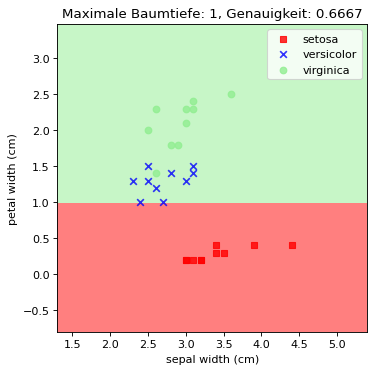

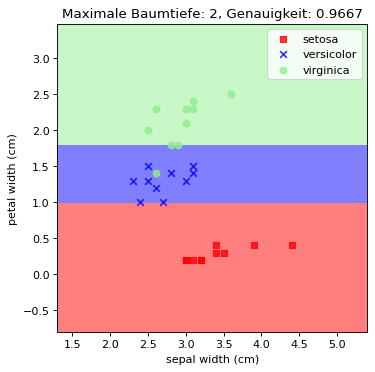

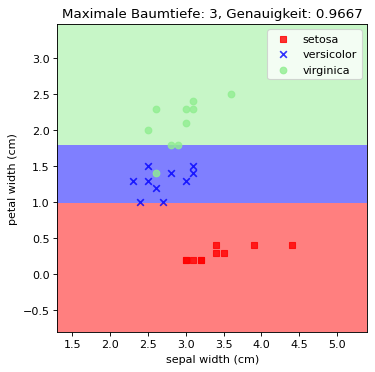

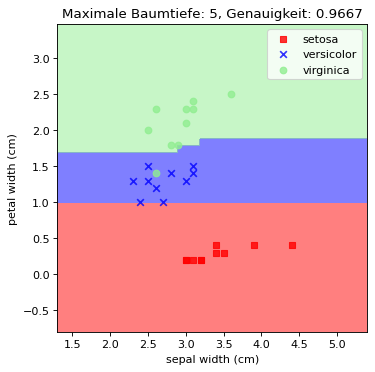

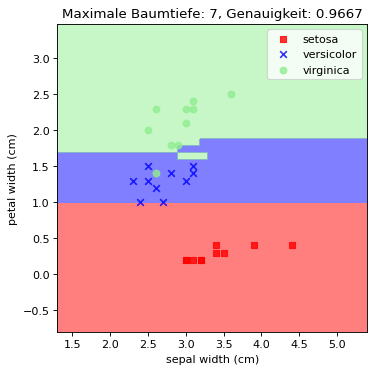

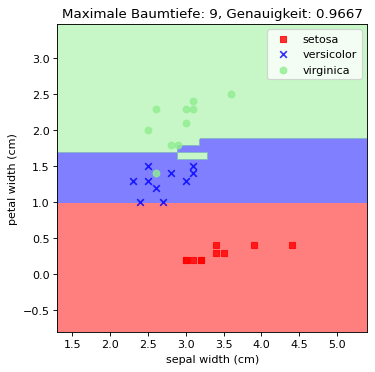

In [7]:
for depth in [1, 2, 3, 5, 7, 9]:
    dtclassifier = DecisionTreeClassifier(max_depth=depth)
    dtclassifier.fit(X_train, y_train)
    plot_decision_regions(X_test, y_test, dtclassifier, depth)

(6) **[Optional]** Vergleichen Sie Ihre Implementierung und Ihr Ergebnis mit der offiziellen Implementierung. Nutzen Sie dazu die folgenden Methoden von *scikit-learn*:
 * Trainieren Sie einen Entscheidungsbaum mit `tree.DecisionTreeClassifier`([Link](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)) und der Methode `fit` analog zu Aufgabe (5).
     * Geben Sie für den Parameter `criterion` 'entropy' an.
 * Treffen Sie eine Vorhersage auf dem Testset mit der Methode `predict`.
     * Nutzen Sie `metrics.accuracy_score` ([Link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)), um die Genauigkeit zu bestimmen.
 * Bestimmen Sie die optimale Baumtiefe des Entscheidungsbaumes von *scikit-learn* mit `model_selection.GridSearchCV` ([Link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)).

 Beantworten Sie die folgenden Fragen:
 * Haben Sie die selbe Genauigkeit mit Ihrem Entscheidungsbaum erreicht?
 * Erzielt für diese Tiefe auch Ihr Entscheidungsbaum die besten Ergebnisse?

0.6666666666666666
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667


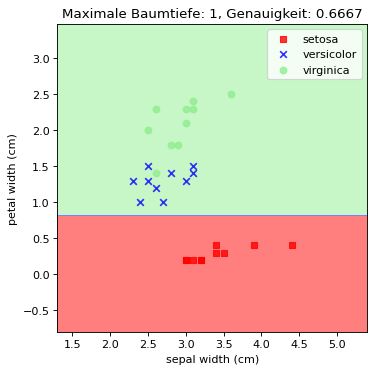

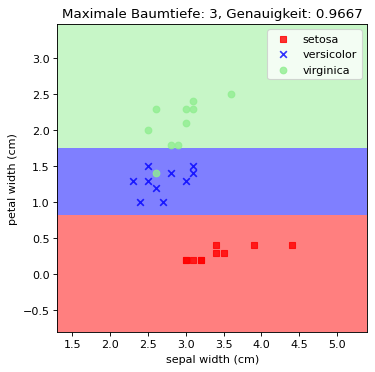

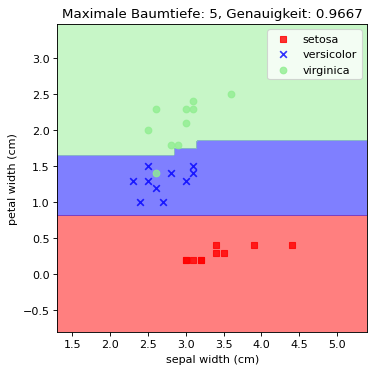

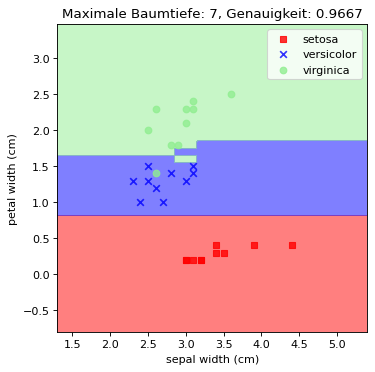

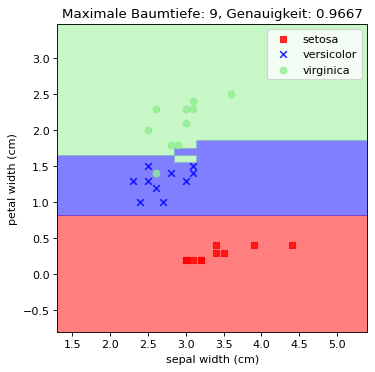

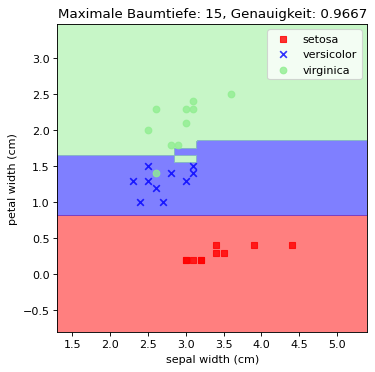

In [8]:
### Aufgabe 6
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

for depth in [1, 3, 5, 7, 9, 15]:
    dtclassifier = DecisionTreeClassifier(random_state=0, max_depth=depth, criterion='entropy')
    dtclassifier.fit(X_train, y_train)

    print(accuracy_score(y_test, dtclassifier.predict(X_test)))
    plot_decision_regions(X_test, y_test, dtclassifier, depth)

0.9666666666666667
{'criterion': 'entropy', 'max_depth': 2}
[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 2 2 2 1 0 2 1 1 1 1]
Beste Parameter: {clf.best_params_} {depth}


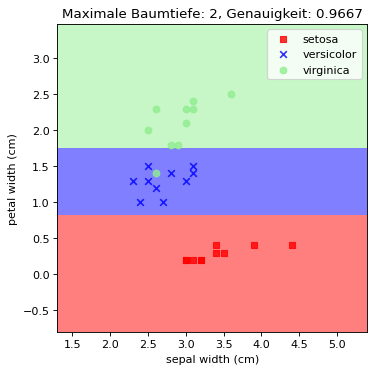

In [10]:
param_dict = {
    'max_depth': range(1, 20),
    'criterion': ['entropy', 'gini']
}
clf = GridSearchCV(DecisionTreeClassifier(), param_grid=param_dict)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
print(clf.best_params_)
print(clf.predict(X_test))
print("Beste Parameter: {clf.best_params_} {depth}")
plot_decision_regions(X_test, y_test, clf, clf.best_params_['max_depth'])